# SPOTLIGHT TOPIC- Detecting Phishing website using data mining techniques

# BY - MOHAMMED MANSOOR SHAREEF -Z1874994

# Detecting Phishing website using data mining techniques
For this task the following dataset is given which have the data to detect the phishing website. We use the data mining technique to detect the phishing website.

### 1. First Approach

### Using Phishing detection with logistic regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.The dependent variable is binary in nature having data coded as either 1 (for success) or 0 (for failure). 

### Lets first import our dataset from the given csv file and reading it throught the pandas

In [1]:
import numpy as np  #importing numpy for handling array operations
import pandas as pd     #importing pandas for reading csv files and dataframes
import matplotlib.pyplot as plt  #for making plots
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr   #All libraries for data visualtization

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale  # For scaling data to 0 to 1 or normalizing it
from sklearn.linear_model import LogisticRegression # Importing data for Logistic Regression
import sklearn.metrics as sm    # For making accuracy matrix
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mansoorshareef1996/spotlight/main/dataset.csv")  #Loading the dataset from the file in variable df

In [3]:
df.head()   #visualize data

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df["Result"][df["Result"] == -1] = 0    #setting the Result key to 0 and 1, if value if result key is -1 we change it to 0
                                        # 0 for false, 1 for true, and now it is a binary classifcation problem

In [5]:
df.head()  #Visualizing changes

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### As we had Result key to detect phishing we have assigned 0 for not phishing and 1 for phing in result key 

IN result Key if value is -1 we suppose there is not phishing and assigned its value to 0 to make it a binary classification problem

In [6]:
df.keys()  #Visualting keys in dataset

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [7]:
df = df.drop("index", axis = 1) #Droping the column index from the dataset as we cant predict anything from index of entry
labels = df.keys()     # getting all keys in lables variable

In [8]:
X = []; Y = []                 # Playing with keys in dataset and moving all keys in array X for training and
for x in labels:               # result key in array Y
    if x == "Result":
        Y.append("Result")
    else:
        X.append(x)


In [9]:
print(X)

['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [10]:
print(Y)

['Result']


In [11]:
X = df[X]     #visulaizing

In [12]:
Y = df[Y]     #visualizing

In [13]:
from sklearn.model_selection import train_test_split #Splitting the data in 3: 7 ratio so that we can check accuracy 
                                                    # for our model dividing all data into test and train set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 33)

In [14]:
len(df.keys())  # checking total no of keys in data sets after removing index key

31

In [15]:
data = df.iloc[:,[i for i in range(len(df.keys()) - 1)]].values    # Assigning all values of keys to data variable 
                                                                   #Except result key for training 

In [16]:
result = df.iloc[:, [len(df.keys()) - 1]].values  #Assigning all values of result key to result

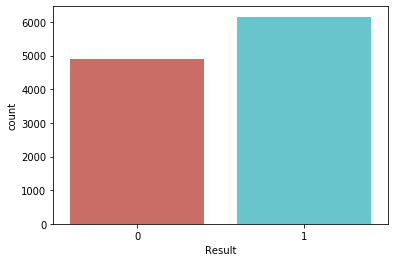

In [17]:
sb.countplot(x="Result",data=df,palette="hls") #Data visualtization of result key with respect to all data

In [18]:
data = scale(data)  # Scaling the data which is not really necessary

In [19]:
from sklearn.model_selection import train_test_split  #playing with data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(data, result, test_size = 0.3, random_state = 33) 

In [21]:
model = LogisticRegression() #create a obect of Logic Regression

In [22]:
model.fit(X_train, Y_train)  #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.score(X_train, Y_train) #Finding scores of model on training data

0.9290514344791936

In [24]:
y_pred = model.predict(X_test)       #Predicting test data

In [25]:
print(y_pred)      #predicted values for test data 0 for not phishing detected and 1 for phishing detected

[1 1 1 ... 0 0 0]


In [26]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred)  # Making report of accuracy of our model
print(report)     # Making accuracy metrics for f1-score and recall

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1436
           1       0.93      0.94      0.93      1881

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.93      0.93      0.93      3317



#### Therfore we got accuracy for it having f1-score = 0.93 means 93 percent accurate results for our model

## 2nd Approach

## Using Phishing detection with decision trees:

In [27]:
import pandas as pd # Importing pandas for loading data
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/Mansoorshareef1996/spotlight/main/dataset.csv") #Loading dataset into df variable from the file

In [29]:
df.head()  #Visualizing the dataset

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [30]:
df.drop("index", axis = 1) #Droping index column because there is no use of it in model

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [31]:
df["Result"][df["Result"] == -1] = 0  #setting the Result key to 0 and 1, if value if result key is -1 we change it to 0
                                        # 0 for false, 1 for true, and now it is a binary classifcation problem

In [32]:
labels = df.keys() #Assigning all keys in labels variable

In [33]:
X_labels = []; Y_labels = []
for x in labels:                         # Playing with keys in dataset and moving all keys in array X for training and
    if x == "Result":                    # result key in array Y
        Y_labels.append("Result")
    else:
        X_labels.append(x)


In [34]:
print(X_labels)
print(Y_labels)  #Visualizing

['index', 'having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
['Result']


In [35]:
X = df[X_labels]  #Assigning all the training data to variable X using lables X_lables

In [36]:
Y = df[Y_labels] #Assinging all the output data to variable Y using lables Y_lables

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 33)

#Splitting the dataset in 3:7 in test and trainin set for testing the accuracy of our model

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [39]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Accuracy: 0.9481459149834187

Accuracy: 0.9481459149834187


In [41]:
print(y_pred)
#Prining the predicted values for our model in series 

[1 1 1 ... 0 0 0]


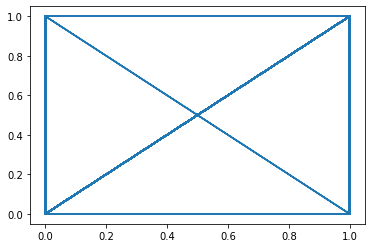

In [42]:
plt.plot(Y_test, y_pred)
plt.show()
#Plot between predicted and real values whether phishing is done or not 0 for not and 1 for yes.